<a href="https://colab.research.google.com/github/Foysal348/All-Linear-Regression/blob/main/Predict_a_value_by_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving USD_Data_Table.csv to USD_Data_Table.csv


In [4]:
import pandas as pd

# Replace with your actual file name
df = pd.read_csv('USD_Data_Table.csv')
df.head()

,Date,Starting (USD),Ending (USD),Unnamed: 3
0,01.01.24,16800.0,16500.0,NaN
1,01.12.23,15900.0,16100.0,NaN
2,01.11.23,15800.0,15300.0,NaN
3,01.10.23,16100.0,16200.0,NaN
4,01.09.23,16300.0,15700.0,NaN


In [5]:
df=df.drop(["Date","Unnamed: 3"],axis=1)
df.head()

,Starting (USD),Ending (USD)
0,16800.0,16500.0
1,15900.0,16100.0
2,15800.0,15300.0
3,16100.0,16200.0
4,16300.0,15700.0


In [6]:
df.rename(columns={"Starting (USD)":"Starting","Ending (USD)":"Ending"},inplace=True)
df


,Starting,Ending
0,16800.0,16500.0
1,15900.0,16100.0
2,15800.0,15300.0
3,16100.0,16200.0
4,16300.0,15700.0
5,16800.0,16400.0
6,15900.0,16200.0
7,15800.0,15500.0
8,16150.0,16100.0
9,16300.0,15800.0


In [7]:
Starting_mean=df["Starting"].mean().round(0)
Ending_mean=df["Ending"].mean().round(0)
print(Starting_mean,Ending_mean)
df["Starting"]=df["Starting"].fillna(Starting_mean)
df["Ending"]=df["Ending"].fillna(Ending_mean)
df.tail()

16235.0 15977.0


,Starting,Ending
11,16300.0,15700.0
12,16700.0,16000.0
13,16235.0,15977.0
14,16235.0,15977.0
15,16235.0,15977.0


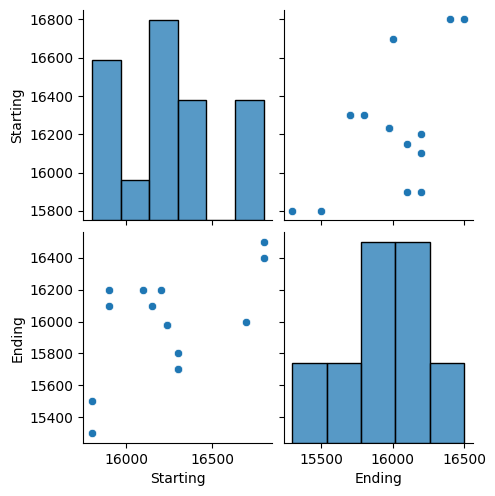

In [8]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

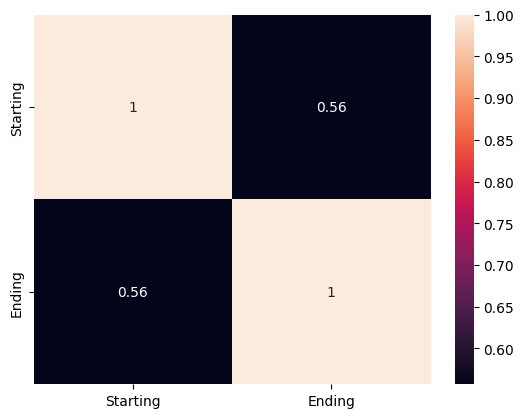

In [9]:
#Corelation
sns.heatmap(df.corr(),annot=True)

In [20]:
import numpy as np
x=df["Starting"]
x_=np.array(x).reshape(-1,1)
y=df["Ending"]

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_,y)
print(model.coef_,model.intercept_)

[0.55806775] 6916.882052877201


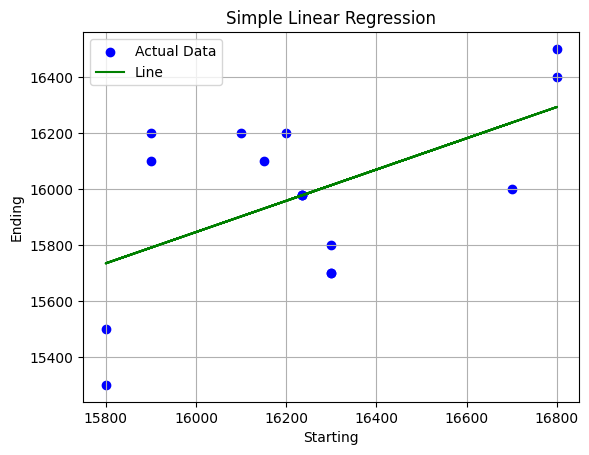

Coefficient(slope): [0.55806775]
Intercept: 6916.882052877201


In [28]:
import matplotlib.pyplot as plt

#Prediction y(cap)
y_pred=model.predict(x_)

#Visualization
plt.scatter(x_,y,color='blue',label='Actual Data')
plt.plot(x_,y_pred,color='g',label='Line')
plt.xlabel("Starting")
plt.ylabel("Ending")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid()
plt.show()

 #display Coefficients
print("Coefficient(slope):",model.coef_)
print("Intercept:", model.intercept_)

#Prediction


In [31]:
Input=float(input("Enter a starting value: "))
model.predict([[Input]])

Enter a starting value: 16790


array([16286.83949476])